## Test to implement MLJ Theory

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from mpmath import nsum, exp, inf
import math
import os
import pandas as pd
from scipy.optimize import curve_fit

### Parameters

In [2]:
k = 1.38064852*10**(-23) #[m2*kg/(s2*K)]
k_eV = 8.617333262145*10**(-5) #[eV/K]
hbar = 1.0545718*10**(-34) #[m2*kg / s]
hbar_eV = 6.5821*10**(-16) #[eV/s] 

In [66]:
#lam = 0.3 #[eV]
#lam_o = 0.5*0.3 #[eV]
hbar_w_i = 0.165 #[eV]
S_i = 1
#sig = 0.05 #[eV]

### MLJ Equation

In [90]:
def EQE_MLJ(E, f, E_CT, l_o): #, S_i, hbar_w_i): # Make sure that the prefactor is correct
    EQE_MLJ_list = []
    for e in E:
        EQE = 0
        for v in range(0,10):
            EQE_v = f/(e*math.sqrt(4*math.pi*k_eV*l_o*290)) \
                * (math.exp(-S_i)*S_i**v / math.factorial(v)) \
                * math.exp(-((-e+E_CT+l_o+v*hbar_w_i)**2) / (4*l_o*k_eV*290))
            EQE += EQE_v
            #* nsum(lambda v: (math.exp(-S_i)*S_i**v / (math.factorial(v))) \
            #, [0, inf])
        EQE_MLJ_list.append(EQE)
        
    return EQE_MLJ_list   

In [91]:
def EQE_MLJ_Test(e, f, E_CT, l_o): #, S_i, hbar_w_i): # Make sure that the prefactor is correct
    EQE = 0
    for v in range(0, 6):
        EQE_v = f/(e*math.sqrt(4*math.pi*k_eV*l_o*290)) \
            * (math.exp(-S_i)*S_i**v / math.factorial(v)) \
            * math.exp(-((-e+E_CT+l_o+v*hbar_w_i)**2) / (4*l_o*k_eV*290))
        EQE += EQE_v
        
    return EQE 

In [92]:
data = pd.DataFrame.from_csv('Data_Test/DR38_B_5_ZnPc_C60_8')

/home/jungbluth/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  """Entry point for launching an IPython kernel.


In [93]:
x = data['Energy']
y = data['EQE']

x_f = x[90:]
y_f = y[90:]

In [94]:
best_vals, covar = curve_fit(EQE_MLJ, x_f, y_f)

In [95]:
best_vals

array([0.0083503 , 1.2647078 , 0.33338922])

In [96]:
y_fit = EQE_MLJ(x[30:], best_vals[0], best_vals[1], best_vals[2])

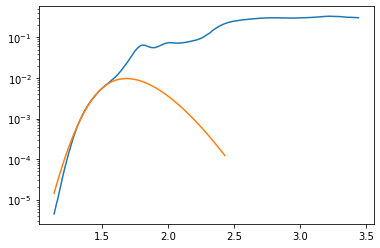

In [97]:
plt.figure()
plt.semilogy(x,y)
plt.semilogy(x[30:],y_fit)
#plt.xlim(1.2, 2.5)
plt.show()